In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("titles.csv")
df.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [18]:
df1 = pd.read_csv("cast.csv")
df1.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [10]:
df2 = df1[df1['character'].isin(['Superman', 'Batman'])]
df3 = df2.groupby(['year', 'character']).size().unstack(fill_value=0)
df4 = df3[df3['Superman'] > df3['Batman']]
len(df4)


11

In [11]:
df2 = df1[df1['character'].isin(['Superman', 'Batman'])]
df3 = df2.groupby(['year', 'character']).size().unstack(fill_value=0)
df4 = df3[df3['Superman'] < df3['Batman']]
len(df4)


27

In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

In [3]:
df1.groupby(['year','type']).size()

year  type   
1894  actor       2
      actress     1
1900  actor       2
1905  actor       1
1906  actor      14
                 ..
2024  actress     6
2025  actor       5
      actress     4
2115  actor       2
      actress     1
Length: 243, dtype: int64

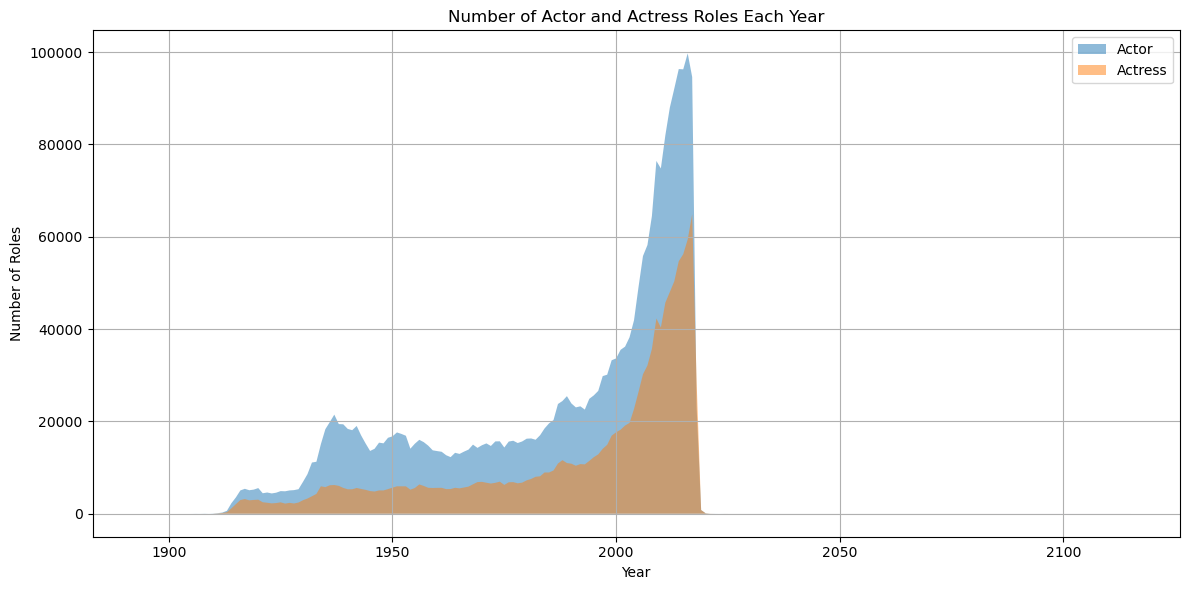

In [15]:
df2 = df1.groupby(['year', 'type'])['character'].count().unstack()
plt.figure(figsize=(12, 6))
plt.fill_between(df2.index, df2['actor'], label='Actor', alpha=0.5)
plt.fill_between(df2.index, df2['actress'], label='Actress', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

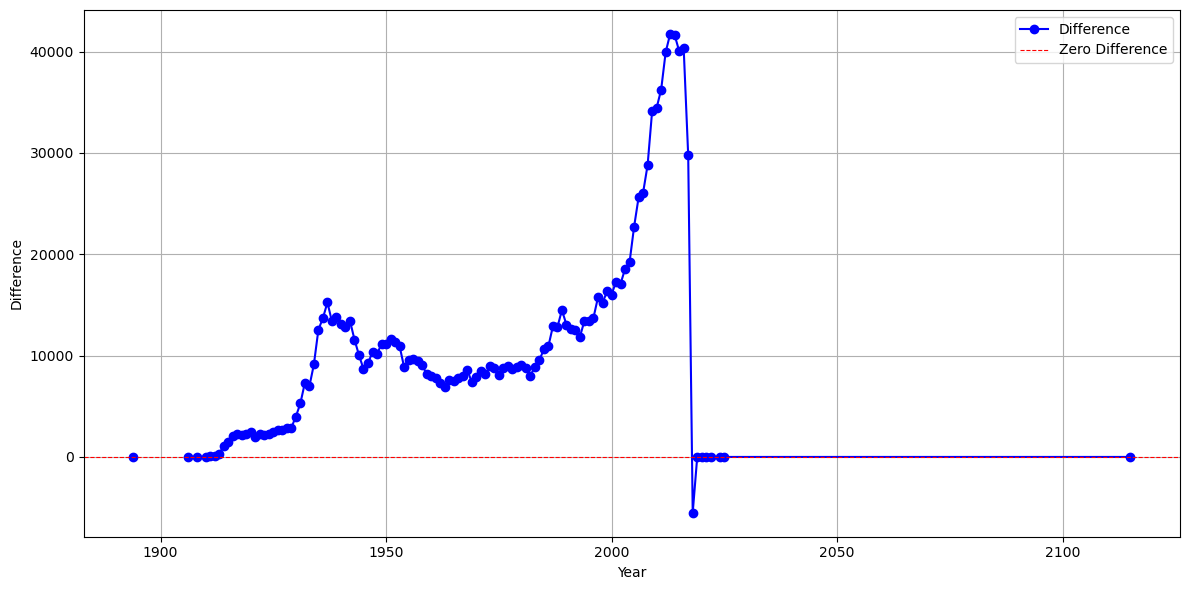

In [16]:
df2 = df1.groupby(['year', 'type'])['character'].count().unstack()
df3 = df2['actor'] - df2['actress']
plt.figure(figsize=(12, 6))
plt.plot(df3.index, df3, label='Difference', marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Difference')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Zero Difference')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

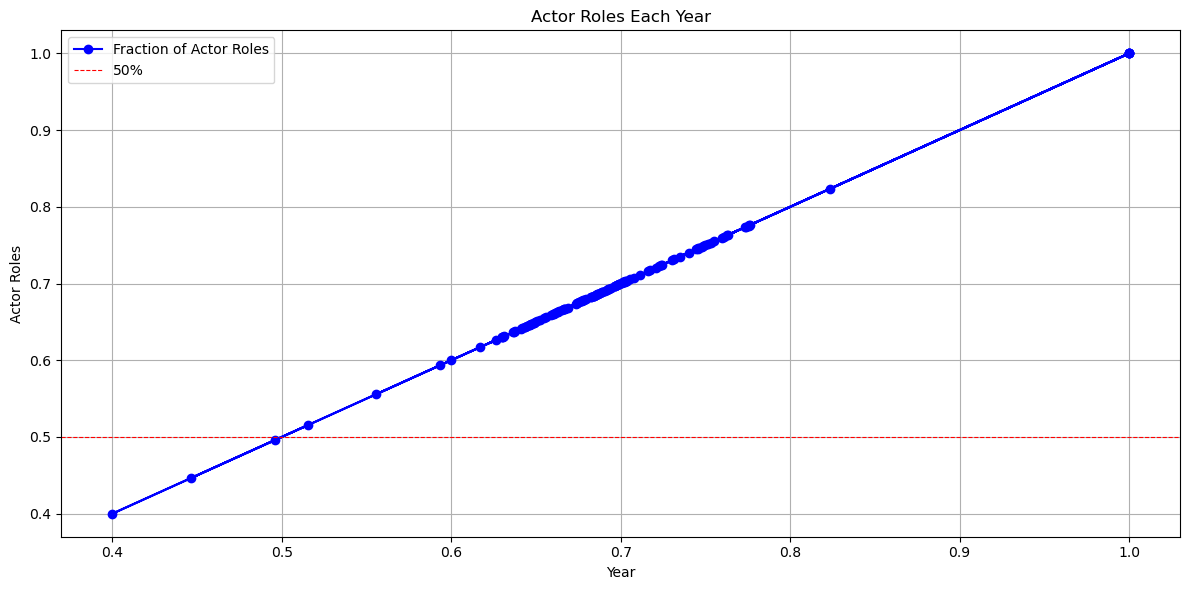

In [19]:
df2 = df1.groupby(['year', 'type'])['character'].count().unstack()
df3 = df2.sum(axis=1)  
df4 = df2['actor'] 
df5 = df4 /df3
plt.figure(figsize=(12, 6))
plt.plot(df5, df5, label='Fraction of Actor Roles', marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Actor Roles')
plt.title('Actor Roles Each Year')
plt.axhline(0.5, color='red', linestyle='--', linewidth=0.8, label='50%')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

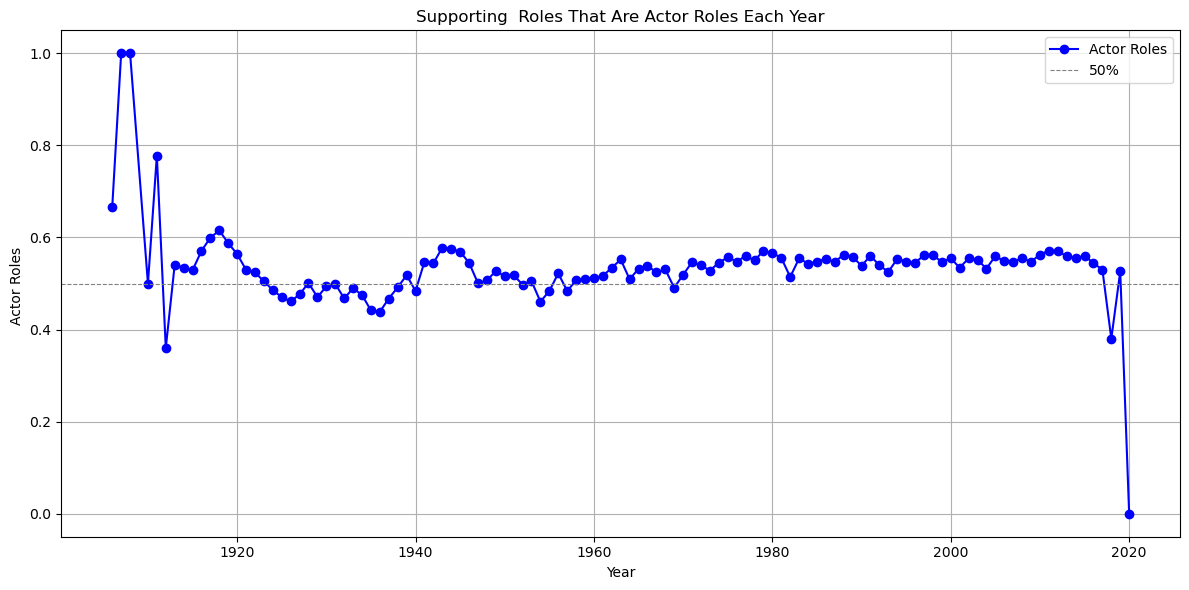

In [20]:
df2= df1[(df1['n'] == 2)]
df3 = df2.groupby(['year', 'type'])['character'].count().unstack()
df4= (df3['actor'] / df3.sum(axis=1)).fillna(0)
plt.figure(figsize=(12, 6))
plt.plot(df4.index, df4, label='Actor Roles', marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Actor Roles ')
plt.title('Supporting  Roles That Are Actor Roles Each Year')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8, label='50%')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

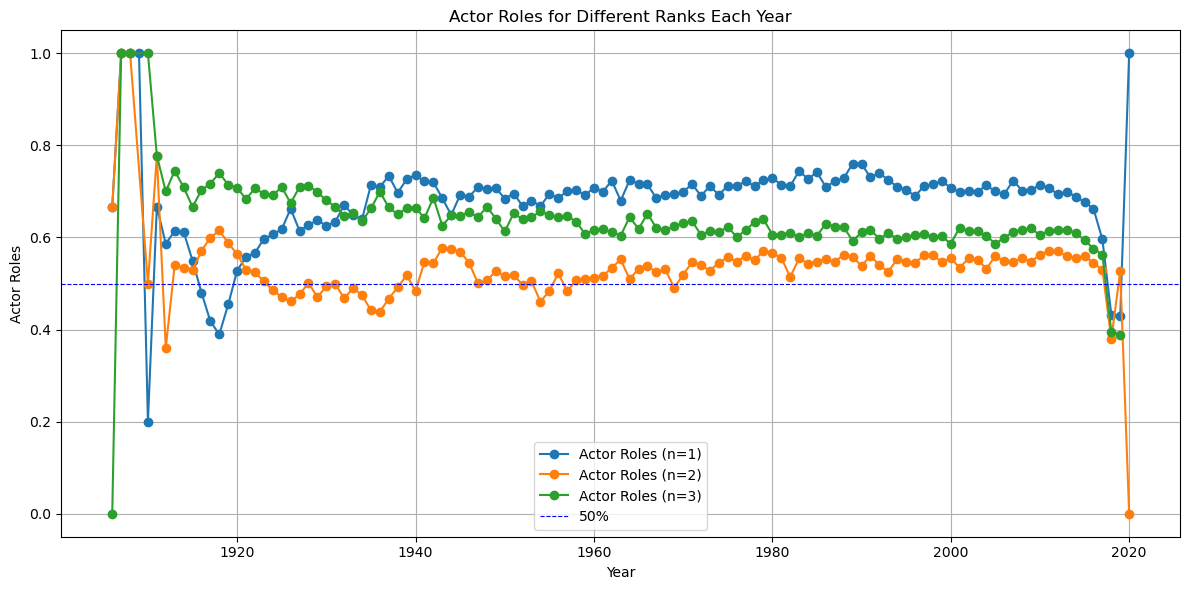

In [21]:
dit = {}
for n in range(1, 4):
        df2 = df1[df1['n'] == n]
        df3 = df2.groupby(['year', 'type'])['character'].count().unstack()
        dit[n] = (df3['actor'] / df3.sum(axis=1)).fillna(0)
plt.figure(figsize=(12, 6))
for n, f in dit.items():
    plt.plot(f.index, f, label=f'Actor Roles (n={n})', marker='o')
plt.xlabel('Year')
plt.ylabel('Actor Roles')
plt.title('Actor Roles for Different Ranks Each Year')
plt.axhline(0.5, color='blue', linestyle='--', linewidth=0.8, label='50%')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()